In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Data set
x1_train = [7, 4, 8, 5, 7, 3, 7, 8, 3, 5]
x2_train = [9, 4, 7, 5, 8, 9, 5, 4, 4, 8]
y_train = [91, 45, 65, 52, 76, 48, 78, 64, 32, 51]
x1_test = [2, 3, 6, 5]
x2_test = [3, 4, 7, 9]
y_test = [26, 36, 56, 57]

In [20]:
class Linear_Regression:
    def __init__(self, x1, x2, y):
        self.x1 = x1
        self.x2 = x2
        self.y = y
        self.m = len(x1)

    def calculate_hypothesis(self, weight1, weight2, bias, x1_data, x2_data):
        hypothesis = []
        for i in range(len(x1_data)):
            hypothesis.append(weight1 * x1_data[i] + weight2 * x2_data[i] + bias)
        return hypothesis

    def calculate_cost(self, weight1, weight2, bias, lambda_):
        hypothesis = self.calculate_hypothesis(weight1, weight2, bias, self.x1, self.x2)
        cost = 0
        for i in range(self.m):
            cost += (hypothesis[i] - self.y[i]) ** 2
        cost = cost / (2 * self.m)
        cost += (lambda_ / (2 * self.m)) * (weight1 ** 2 + weight2 ** 2)
        return cost

    def gradient_descent(self, learning_rate, weight1, weight2, bias, lambda_):
        hypothesis = self.calculate_hypothesis(weight1, weight2, bias, self.x1, self.x2)
        weight1_gradient = 0
        weight2_gradient = 0
        bias_gradient = 0

        for i in range(self.m):
            weight1_gradient += (hypothesis[i] - self.y[i]) * self.x1[i]
            weight2_gradient += (hypothesis[i] - self.y[i]) * self.x2[i]
            bias_gradient += (hypothesis[i] - self.y[i])

        # Apply averaging and regularization correctly
        weight1_gradient = (weight1_gradient / self.m) + (lambda_ / self.m) * weight1
        weight2_gradient = (weight2_gradient / self.m) + (lambda_ / self.m) * weight2
        bias_gradient = bias_gradient / self.m

        # Update weights
        weight1 -= learning_rate * weight1_gradient
        weight2 -= learning_rate * weight2_gradient
        bias -= learning_rate * bias_gradient

        return weight1, weight2, bias

    def train(self, learning_rate, weight1, weight2, bias, lambda_, epochs):
        cost_history = []
        weight1_history = []
        weight2_history = []
        bias_history = []

        for i in range(epochs):
            weight1, weight2, bias = self.gradient_descent(learning_rate, weight1, weight2, bias, lambda_)
            cost = self.calculate_cost(weight1, weight2, bias, lambda_)

            weight1_history.append(weight1)
            weight2_history.append(weight2)
            bias_history.append(bias)
            cost_history.append(cost)

        return weight1_history, weight2_history, bias_history, cost_history

    def tabulate_weights(self, weight1_history, weight2_history, bias_history):
        results = pd.DataFrame({
            'Weight 1': weight1_history,
            'Weight 2': weight2_history,
            'Bias': bias_history
        })

        fig, ax = plt.subplots()
        ax.axis('off')
        ax.table(cellText=results.values, colLabels=results.columns, loc='center')
        plt.show()
        return results

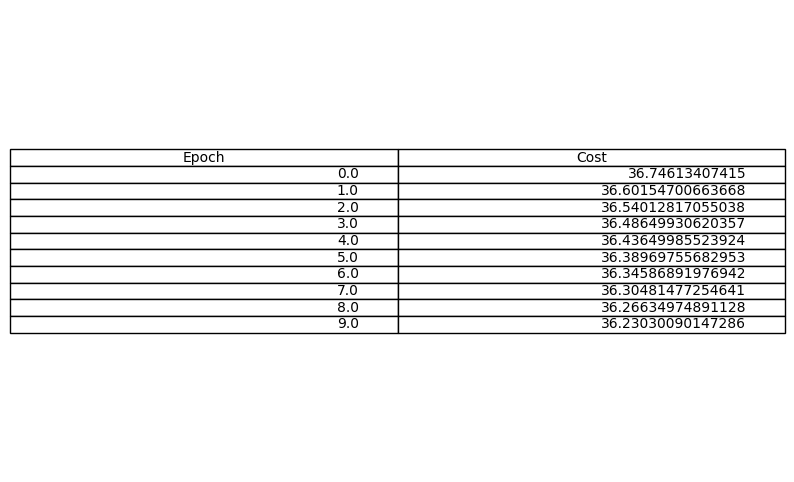

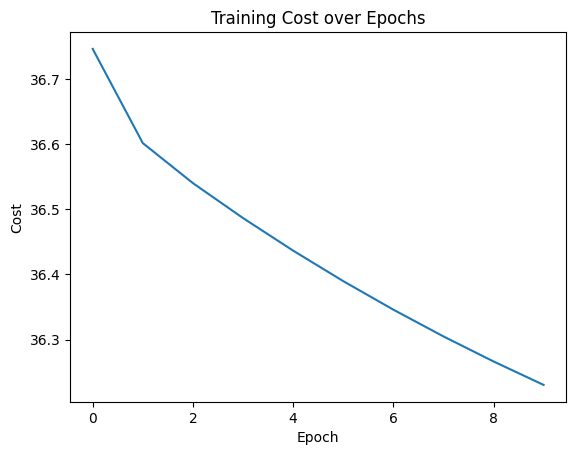

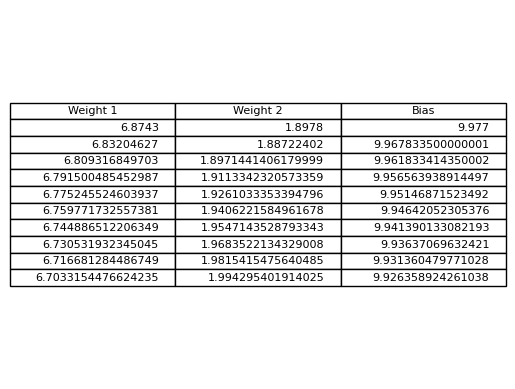

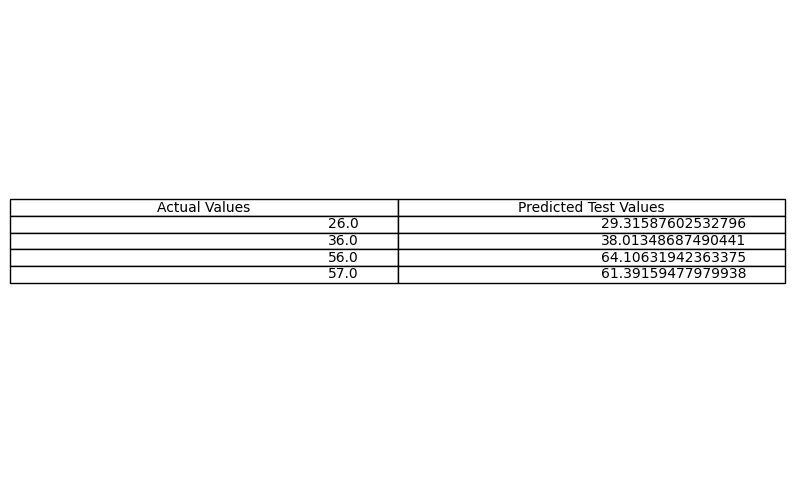

Overall Cost of Test Data: 36.23030090147286


In [21]:
# Using self-made linear regression model
model = Linear_Regression(x1_train, x2_train, y_train)

# Train model (no external loop)
weight1, weight2, bias, cost_history = model.train(
    learning_rate=0.01,
    weight1=7,
    weight2=2,
    bias=10,
    lambda_=0.1,
    epochs=10
)

# Extracting the final values of weights and bias
w1 = weight1[-1]
w2 = weight2[-1]
b = bias[-1]

# Make DataFrame of training cost per epoch
results = pd.DataFrame({
    'Epoch': range(len(cost_history)),
    'Cost': cost_history
})

# Plot and tabulate cost history
plt.figure(figsize=(10, 6))
plt.table(cellText=results.values, colLabels=results.columns, loc='center')
plt.axis('off')
plt.show()

plt.plot(results['Epoch'], results['Cost'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost over Epochs')
plt.show()

# Display results table
model.tabulate_weights(weight1, weight2, bias)

# Comparing with test data
y_test_pred = model.calculate_hypothesis(w1, w2, b, x1_test, x2_test)

# Make DataFrame of Actual Vs Test Data
results = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Test Values': y_test_pred
})

# Plot and tabulate cost history
plt.figure(figsize=(10, 6))
plt.table(cellText=results.values, colLabels=results.columns, loc='center')
plt.axis('off')
plt.show()

# Printing the overall cost of test data
cost = model.calculate_cost(w1, w2, b, 0.1)
print(f"Overall Cost of Test Data: {cost}")